# Unit 5 - Financial Planning

In [141]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [142]:
# Load .env enviroment variable
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [143]:
# Set current amount of crypto assets
monthly_income  = 12000
my_btc = 1.2
my_eth = 5.3

In [144]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [145]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

total_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27870.00
The current value of your 5.3 ETH is $8414.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [146]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [147]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [148]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
agg= ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
spy = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
ticker_data = pd.concat([agg, spy], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
ticker_data

AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-27 05:00:00+00:00  99.96  100.14  99.91  100.08  5123098       18192   

                                           SPY                          \
                                 vwap     open    high     low   close   
timestamp                                                                
2023-01-27 05:00:00+00:00  100.061411  403.655  408.16  403.44  405.68   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-27 05:00:00+00:00  68346180      496480  405.790293

In [149]:
# Pick AGG and SPY close prices
agg_closing = ticker_data['AGG']['close'].loc[ticker_data["AGG"].index[0]]
spy_closing =  ticker_data['SPY']['close'].loc[ticker_data["SPY"].index[0]]
# Print AGG and SPY close prices
print(agg_closing)
print(spy_closing)

100.08
405.68


In [150]:
# Compute the current value of shares
my_spy = 110
my_agg = 200

my_agg_value = agg_closing * my_agg
my_spy_value = spy_closing * my_spy

total_stock = my_agg_value + my_spy_value


# Print current value of shares
print(f"The current value of your {agg_closing} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {spy_closing} AGG shares is ${my_agg_value:0.2f}")

The current value of your 100.08 SPY shares is $44624.80
The current value of your 405.68 AGG shares is $20016.00


### Savings Health Analysis

In [151]:
# Set monthly household income
savings_data = [total_crypto, total_stock]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index = ["Crypto", "Stock/Bond"],  columns = ["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,36284.174
Stock/Bond,64640.800


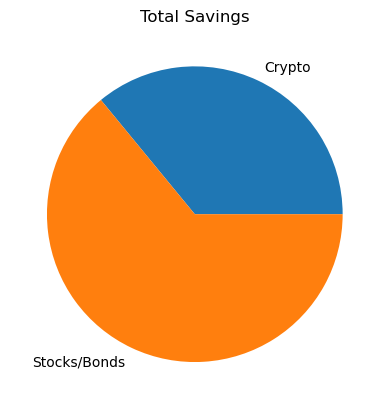

In [152]:
# Plot savings pie chart
my_lables = ["Crypto", "Stocks/Bonds"]
pie = plt.pie(savings_data, labels = mylables)
pie = plt.title("Total Savings")


In [153]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_stock
# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have enough money in this fund")
elif total_savings == emergency_fund:
    print("Congrats on reaching this financial milestone!")
else:
    money_needed = emergency_fund - total_savings
    print("Im sorry you need about " + money_needed + " to reach this goal")
# YOUR CODE HERE!

Congrats! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [154]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-20', tz='America/New_York').isoformat()

In [155]:
# Get 5 years' worth of historical data for SPY and AGG
historical_ticker =  alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
agg= historical_ticker[historical_ticker['symbol']=='AGG'].drop('symbol', axis=1)
spy = historical_ticker[historical_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg, spy], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   
2018-02-05 05:00:00+00:00  107.13  107.810  107.00  107.63   5991756   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-01-30 05:00:00+00:00       14454  108.010293  282.59  284.736  281.22   
2018-01-31 05:00:00+00:00       29280  108.033072  282.73  283.300  280.68   
2018-02-01 05:00:00+00:00       26477  107.695566  281.08  283.060  280.68   
2018-02-02 05:00:00+00:00       17781  107.197964  280.08  280.230  275.41   
2018-02-05 05:00:00+00:00       26360  107.347994  273.45  275.850  263.31   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-30 05:00:00+00:00  281.63  132075557      427207  282.425628  
2018-01-31 05:00:00+00:00  281.91  118954475      363005  281.967347  
2018-02-01 05:00:00+00:00  281.68   90622947      304909  281.766220  
2018-02-02 05:00:00+00:00  275.51  175825647      548623  277.434737  
2018-02-05 05:00:00+00:00  264.11  298863447     1178563  269.869953

In [156]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [157]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   
2018-02-05 05:00:00+00:00  107.13  107.810  107.00  107.63   5991756   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-30 05:00:00+00:00       14454  108.010293          NaN  282.59   
2018-01-31 05:00:00+00:00       29280  108.033072     0.000833  282.73   
2018-02-01 05:00:00+00:00       26477  107.695566    -0.005365  281.08   
2018-02-02 05:00:00+00:00       17781  107.197964    -0.002976  280.08   
2018-02-05 05:00:00+00:00       26360  107.347994     0.004011  273.45   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2018-01-30 05:00:00+00:00  284.736  281.22  281.63  132075557      427207   
2018-01-31 05:00:00+00:00  283.300  280.68  281.91  118954475      363005   
2018-02-01 05:00:00+00:00  283.060  280.68  281.68   90622947      304909   
2018-02-02 05:00:00+00:00  280.230  275.41  275.51  175825647      548623   
2018-02-05 05:00:00+00:00  275.850  263.31  264.11  298863447     1178563   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-30 05:00:00+00:00  282.425628          NaN  
2018-01-31 05:00:00+00:00  281.967347     0.000994  
2018-02-01 05:00:00+00:00  281.766220    -0.000816  
2018-02-02 05:00:00+00:00  277.434737    -0.021904  
2018-02-05 05:00:00+00:00  269.869953    -0.041378

In [158]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\edorion\Desktop\JupyterLab\module -5 challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009270,1.011384,1.006015,1.000513,1.007061,1.000729,1.011225,0.984828,0.999617,1.006181,...,0.996969,1.005970,0.998104,1.006570,0.986118,1.006736,1.004160,0.988545,0.993531,0.994588
2,0.998848,1.020940,1.011118,1.001342,1.004925,1.010218,1.003524,0.991627,1.005161,1.006909,...,0.995859,1.002708,0.993366,0.995182,0.997455,1.001685,0.997662,0.994877,1.005145,0.980145
3,1.002459,1.026833,1.029893,1.003523,1.002653,1.011154,1.000904,0.986998,0.997541,0.999105,...,0.984615,1.001449,0.990492,0.974412,0.997757,1.000291,0.992546,0.971342,1.000479,0.977129
4,1.016808,1.024013,1.022955,1.002652,0.992117,1.008123,1.011647,0.992973,0.985872,1.007181,...,0.990277,0.999610,1.003771,0.965713,1.005019,1.009405,0.980479,0.967542,1.007090,0.964076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.341187,4.176555,1.072947,2.080079,3.964152,3.613966,3.780044,1.642061,1.212007,8.310215,...,2.926802,2.786551,9.945233,4.069028,1.176408,1.647239,3.611743,9.061663,1.551954,4.101404
7557,6.333398,4.132743,1.079846,2.097035,3.954186,3.609455,3.796215,1.621178,1.209118,8.243545,...,2.913812,2.807879,9.925490,4.030880,1.176990,1.644860,3.575713,9.057638,1.549374,4.150186
7558,6.280470,4.130476,1.065795,2.098985,3.885597,3.646295,3.809781,1.635358,1.215494,8.270284,...,2.923543,2.811126,9.976097,4.068216,1.185699,1.639428,3.524839,9.140097,1.566947,4.163303
7559,6.319334,4.165180,1.074705,2.077808,3.891185,3.629563,3.770116,1.659436,1.204318,8.291201,...,2.890680,2.809899,10.019208,4.066985,1.189511,1.624026,3.456604,9.149120,1.563127,4.155458


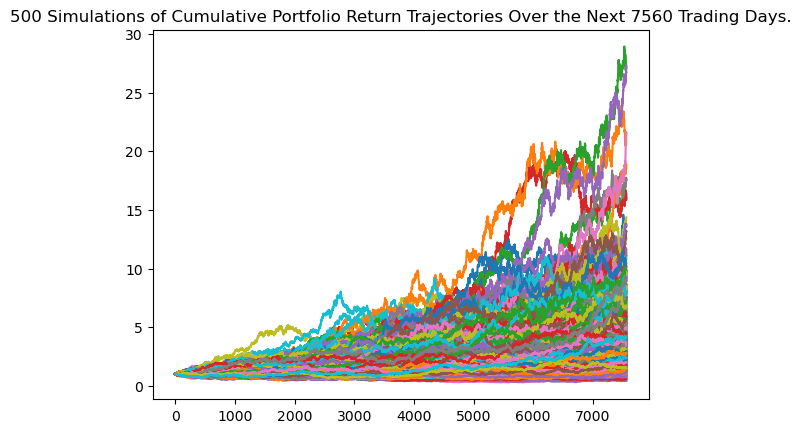

In [159]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

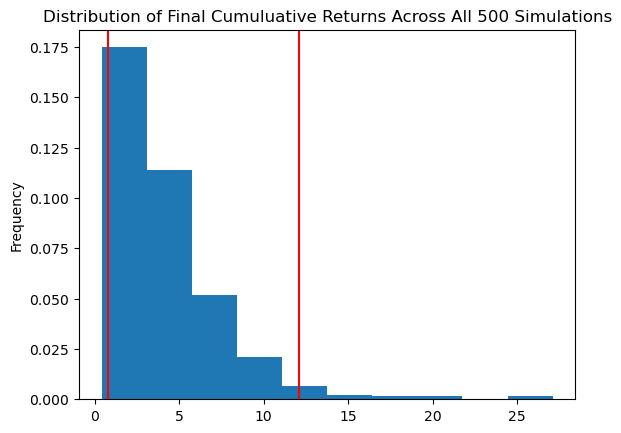

In [160]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [170]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_thirty_year = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_thirty_year)

count           500.000000
mean              4.260437
std               3.365638
min               0.424431
25%               2.095915
50%               3.307841
75%               5.445889
max              27.088138
95% CI Lower      0.805833
95% CI Upper     12.100264
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [162]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_thirty_year[8]*initial_investment)
ci_upper = round(tbl_thirty_year[9]*initial_investment)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16117 and $242005


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [175]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_thirty_year = round(tbl[8]*initial_investment)
ci_upper_thirty_year = round(tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_year} and ${ci_upper_thirty_year}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24175 and $363008


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [164]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [165]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\edorion\Desktop\JupyterLab\module -5 challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998775,1.001584,0.992383,1.011862,0.986131,1.012499,1.013209,1.004179,1.006957,0.978542,...,0.999287,0.994055,0.998713,1.002920,1.002813,1.003891,0.999873,1.006619,1.021482,0.997984
2,0.998207,0.985828,0.991376,1.016884,0.989593,1.006644,0.998563,0.998877,1.001264,0.987284,...,0.989032,1.006281,0.975999,1.032458,1.007619,1.019917,1.005065,1.027698,1.014313,0.999170
3,1.012946,1.002113,0.980883,1.012280,0.989420,1.007676,1.005672,1.008597,1.013878,0.999780,...,0.994684,1.004983,0.981075,1.032935,1.012463,1.017870,1.010914,1.031647,1.045305,0.996510
4,1.001884,1.002292,0.990104,1.018862,0.985176,0.997135,1.011749,1.005128,1.007041,1.007120,...,0.992346,0.996280,0.976576,1.028267,1.021574,1.014031,1.011988,1.018158,1.031984,1.001775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.730919,1.193892,0.883763,1.156294,1.124484,0.821960,1.830887,1.935812,1.643971,1.897798,...,0.476421,1.786265,0.497289,1.910294,0.948353,1.199792,1.181357,1.897034,0.965754,1.225785
1257,2.753519,1.174639,0.884580,1.149926,1.127391,0.802143,1.831448,1.898096,1.650794,1.914703,...,0.471684,1.756134,0.496532,1.934887,0.959687,1.180020,1.210703,1.878617,0.960219,1.229145
1258,2.800810,1.169987,0.877773,1.150976,1.109933,0.789027,1.845860,1.879344,1.663305,1.938139,...,0.474029,1.751821,0.503774,1.935019,0.956402,1.164207,1.222759,1.843981,0.949170,1.223784
1259,2.810404,1.188091,0.879336,1.150038,1.132582,0.795706,1.809672,1.917687,1.653960,1.963902,...,0.475178,1.715764,0.501445,1.926076,0.962948,1.166666,1.232320,1.824046,0.964938,1.229187


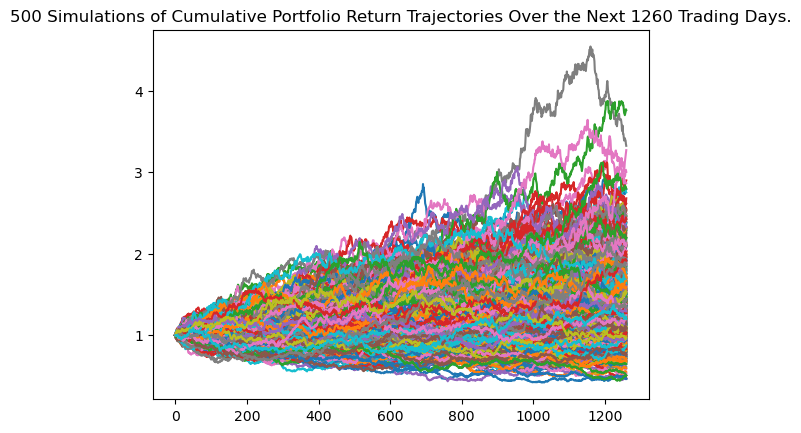

In [167]:
# Plot simulation outcomes
five_year_plot = MC_fiveyear.plot_simulation()

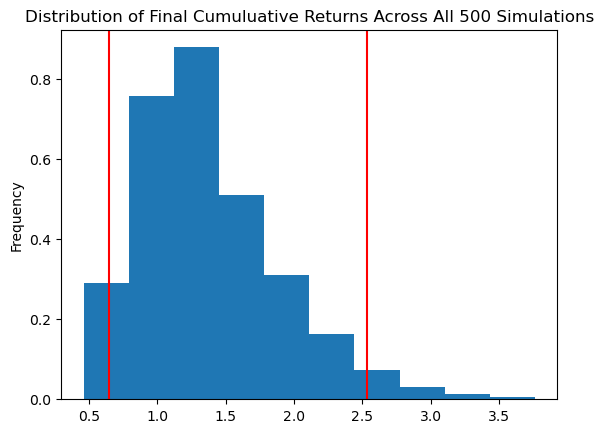

In [168]:
# Plot probability distribution and confidence intervals
dist_five_year = MC_fiveyear.plot_distribution()

In [184]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five_year)

count           500.000000
mean              2.030168
std               1.168829
min               0.394735
25%               1.170782
50%               1.707552
75%               2.533209
max               8.542990
95% CI Lower      0.619232
95% CI Upper      5.078540
Name: 2520, dtype: float64


In [185]:
# Set initial investment
investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five_year = round(tbl_five_year[8]*investment)
ci_upper_five_year = round(tbl_five_year[9]*investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_year} and ${ci_upper_five_year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $37154 and $304712


### Ten Years Retirement Option

In [177]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [178]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\edorion\Desktop\JupyterLab\module -5 challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

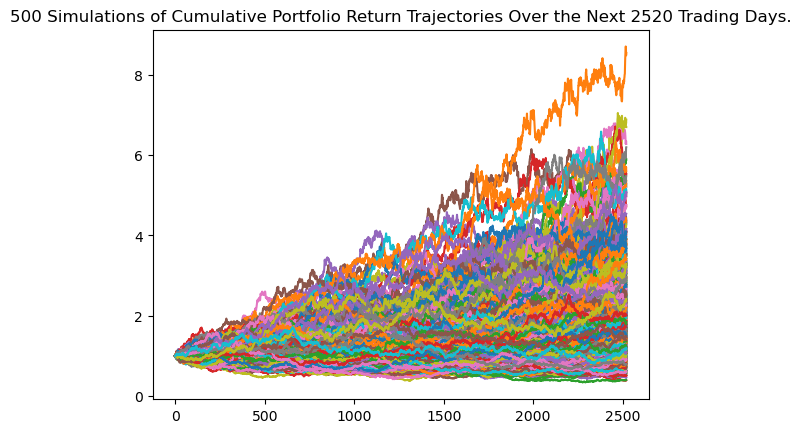

In [179]:
# Plot simulation outcomes
line_plot_ten_year = MC_ten_year.plot_simulation()

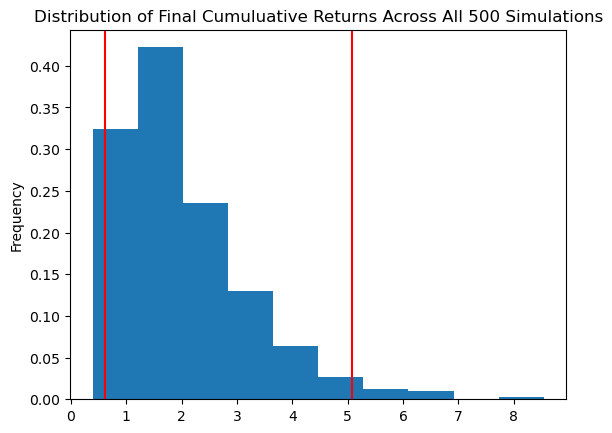

In [180]:
# Plot probability distribution and confidence intervals
dist_ten_year = MC_ten_year.plot_distribution()

In [182]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten_year)

count           500.000000
mean              2.030168
std               1.168829
min               0.394735
25%               1.170782
50%               1.707552
75%               2.533209
max               8.542990
95% CI Lower      0.619232
95% CI Upper      5.078540
Name: 2520, dtype: float64


In [183]:
# Set initial investment
investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_year = round(tbl_ten_year[8]*investment)
ci_upper_ten_year = round(tbl_ten_year[9]*investment)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_year} and ${ci_upper_ten_year}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $37154 and $304712


In [ ]:
# if you weigh the the simulation more to stock the, it will allow for faster reitirement.